Mean Squared Error (MSE): 3.1740973539761033
R-squared (R²) score: 0.899438024100912


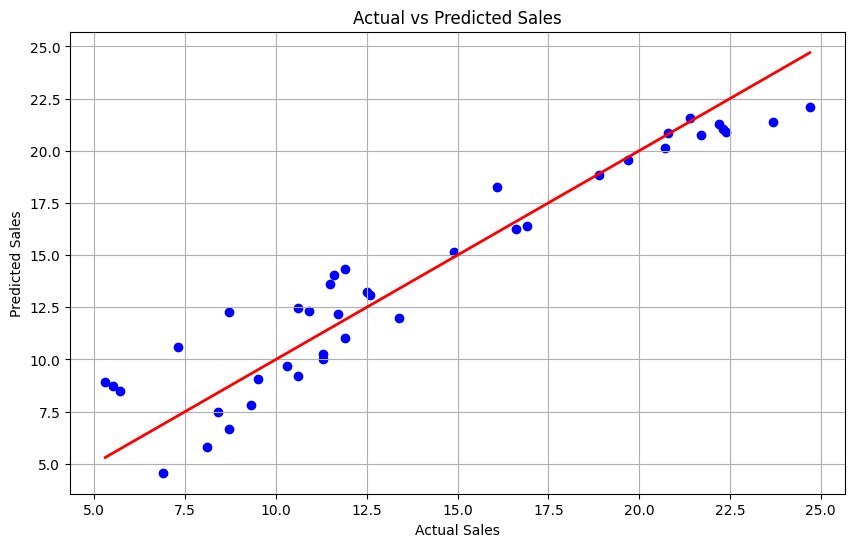

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)

# Selecting features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) score: {r2}")

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


Linear Regression:
  Mean Squared Error (MSE): 3.1740973539761033
  R-squared (R²) score: 0.899438024100912

Decision Tree:
  Mean Squared Error (MSE): 2.175
  R-squared (R²) score: 0.9310914968293178

Random Forest:
  Mean Squared Error (MSE): 0.5907322499999988
  R-squared (R²) score: 0.9812843792541843



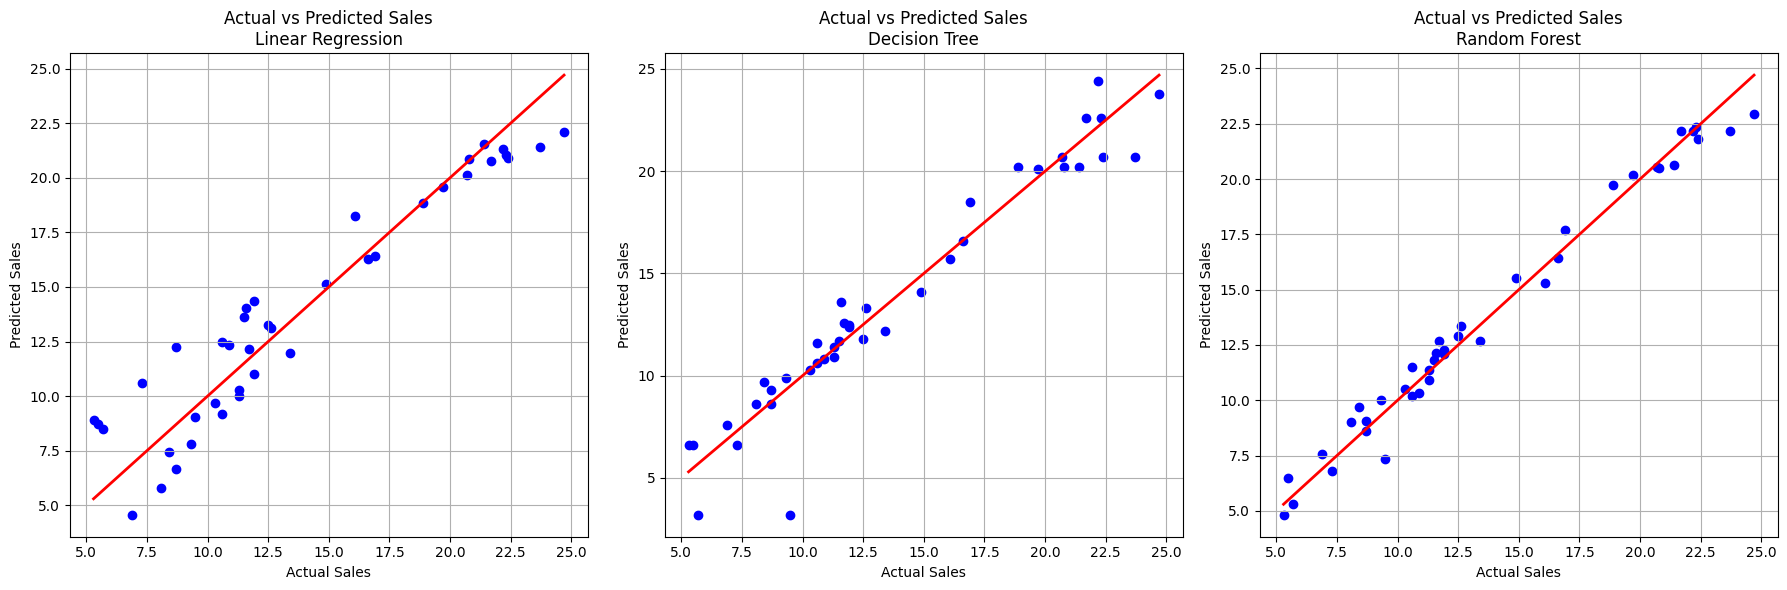

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)

# Selecting features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train, predict and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "mse": mse,
        "r2": r2,
        "y_pred": y_pred
    }
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  R-squared (R²) score: {r2}")
    print()

# Plot actual vs. predicted sales for each model
plt.figure(figsize=(18, 6))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, result["y_pred"], color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales\n{name}')
    plt.grid(True)

plt.tight_layout()
plt.show()
